In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data0 = pd.read_csv('final_data.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,PrefixSuffix,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0


In [ ]:
data0.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,PrefixSuffix,Label
74995,att-106799.weeblysite.com,0,0,0,0,0,0,0,1,1
74996,chesapeaketw.com,0,0,0,1,0,0,0,0,1
74997,goo-co-etdc-inank.city-garden.com.cn,0,0,0,1,0,0,0,1,1
74998,is.gd,0,0,0,1,0,0,1,0,1
74999,a7e77a9b-a92e-456a-a91e-7b1165ff52fa.id.repl.co,0,0,1,0,0,0,0,1,1


In [ ]:
data0.shape

(75000, 10)

In [ ]:
data0.duplicated().sum()


33265

In [ ]:
data0.drop_duplicates(inplace=True)

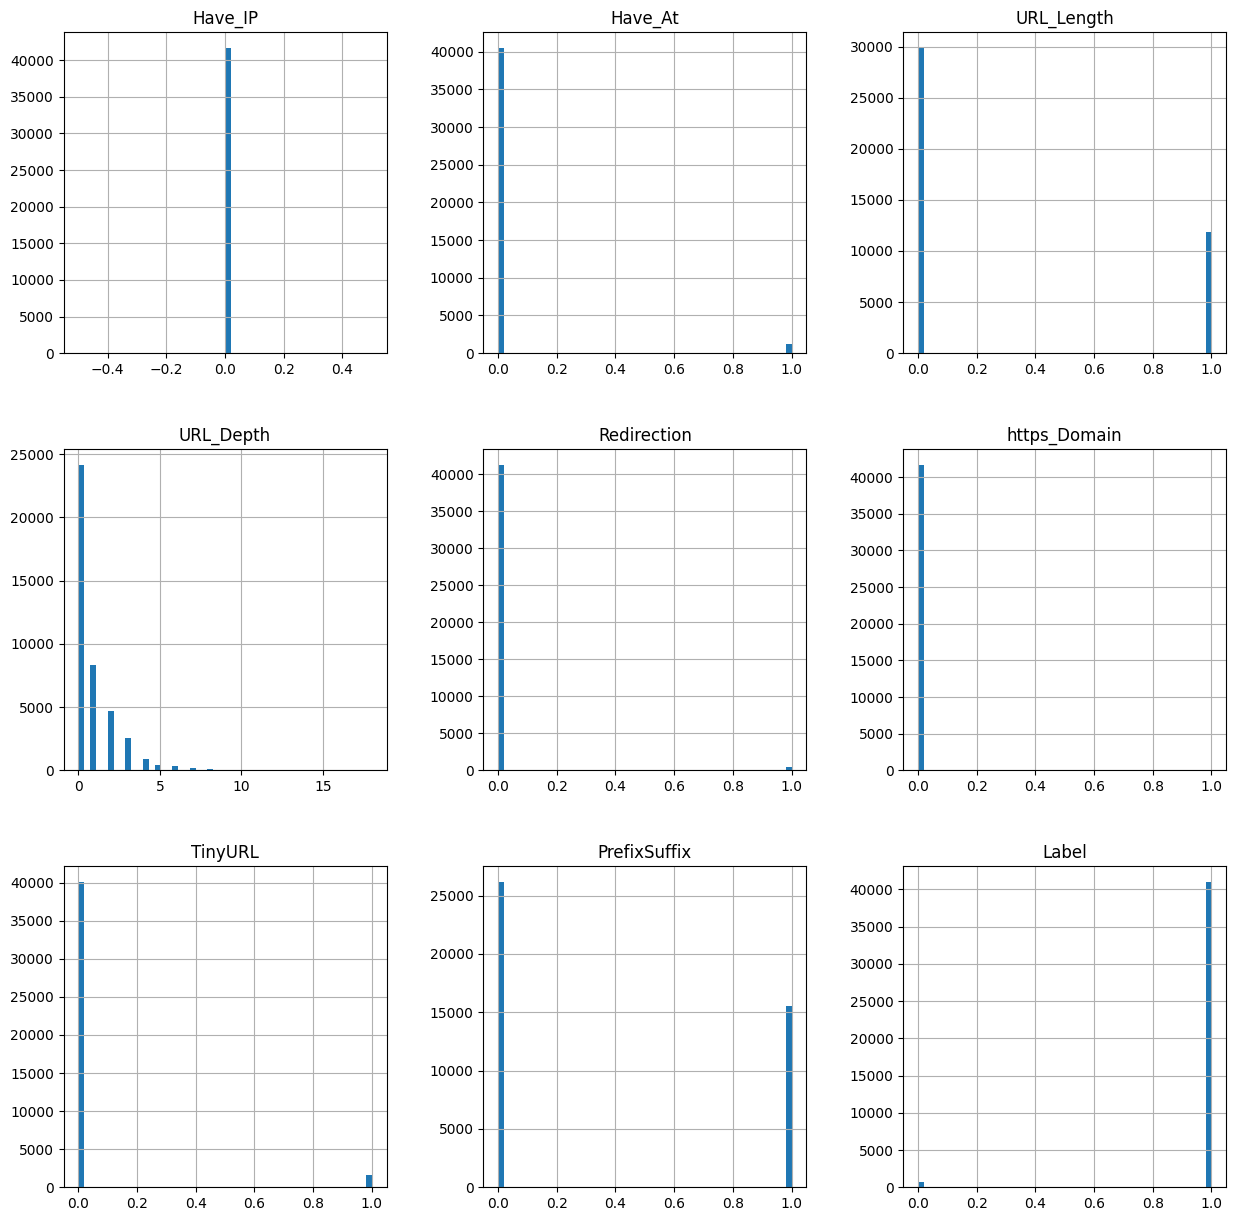

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-9-1845029550a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr(),annot=True,annot_kws={'size':10})


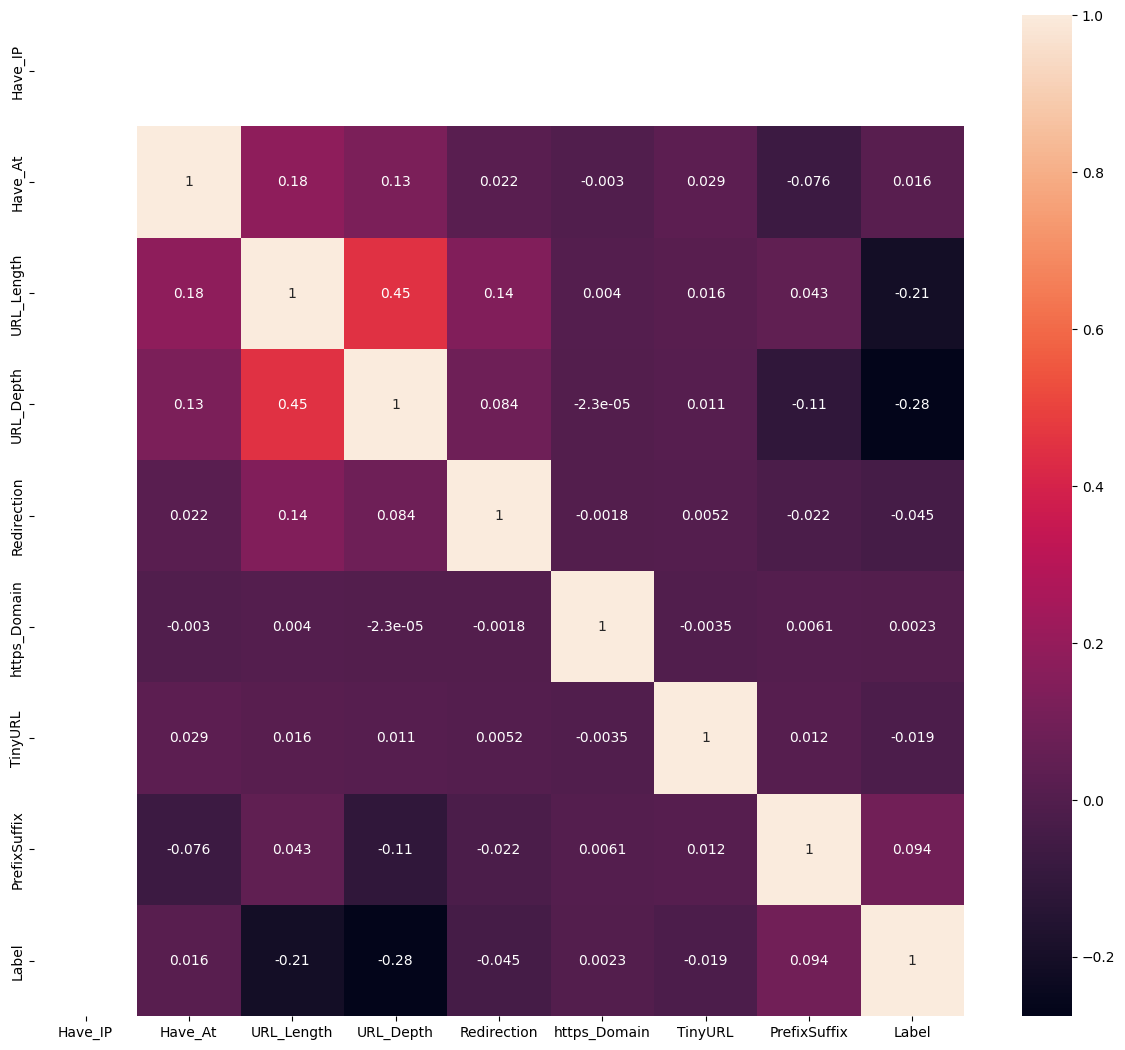

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
data = data.dropna()

# Write the cleaned DataFrame back to an Excel file
data.to_csv('cleaned_file.csv', index=False)

In [ ]:
data0 = pd.read_csv('cleaned_file.csv')
data0.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,PrefixSuffix,Label
0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0
4,0,0,1,3,0,0,0,0,0


In [ ]:
data0.isnull().sum()

Have_IP         0
Have_At         0
URL_Length      0
URL_Depth       0
Redirection     0
https_Domain    0
TinyURL         0
PrefixSuffix    0
Label           0
dtype: int64

In [ ]:
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,PrefixSuffix,Label
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,1,2,0,0,0,1,1
4,0,0,0,1,0,0,0,0,1


In [ ]:
data.shape

(41735, 9)

In [ ]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((41735, 8), (41735,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((33388, 8), (8347, 8))

In [ ]:
print(X_test)

       Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
9438         0        0           0          3            0             0   
22035        0        0           0          0            0             0   
845          0        0           0          1            0             0   
37357        0        0           0          1            0             0   
2181         0        0           0          0            0             0   
...        ...      ...         ...        ...          ...           ...   
19514        0        0           0          0            0             0   
41662        0        0           1          2            0             0   
16796        0        0           0          0            0             0   
25033        0        0           0          1            0             0   
16243        0        0           1          2            0             0   

       TinyURL  PrefixSuffix  
9438         0             0  
22035        

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test_logi = model.predict(X_test)
y_train_logi = model.predict(X_train)

In [ ]:
acc_train_logi = accuracy_score(y_train,y_train_logi)
acc_test_logi = accuracy_score(y_test,y_test_logi)

print("Logistic Regression : Accuracy on training Data: {:.7f}".format(acc_train_logi))
print("Logistic Regression : Accuracy on test Data: {:.7f}".format(acc_test_logi))

Logistic Regression : Accuracy on training Data: 0.9829879
Logistic Regression : Accuracy on test Data: 0.9813107


In [ ]:
storeResults('Logistic Regression', acc_train_logi, acc_test_logi)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [ ]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
logreg_pred = logreg.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

In [ ]:
ensemble_pred = np.array([])
for i in range(len(X_test)):
    preds = [logreg_pred[i], rf_pred[i], gb_pred[i]]
    ensemble_pred = np.append(ensemble_pred, np.bincount(preds).argmax())

In [ ]:
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble accuracy:", ensemble_accuracy)

Ensemble accuracy: 0.9823888822331377


In [ ]:
# storeResults('Ensemble', acc_train_forest, acc_test_forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.7f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.7f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9834072
Random forest: Accuracy on test Data: 0.9819097


In [ ]:
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), forest.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

[[    0   554]
 [    0 32834]]


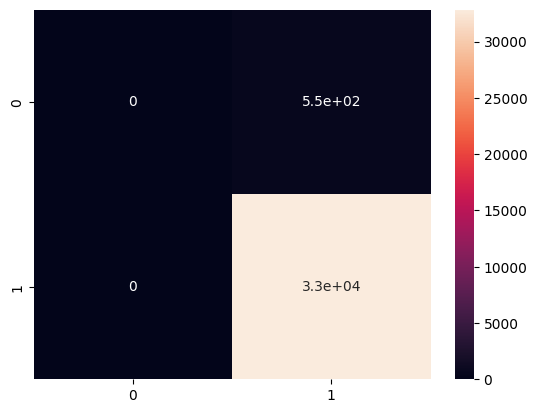

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train,y_train_forest)
sns.heatmap(conf_mat,annot=True)
print(conf_mat)

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
print(X_test)

       Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
9438         0        0           0          0            0             0   
22035        0        0           1          2            0             0   
845          0        0           0          1            0             0   
37357        0        0           0          0            0             0   
2181         0        0           0          0            0             0   
...        ...      ...         ...        ...          ...           ...   
19514        0        0           1          2            0             0   
41662        0        0           0          0            0             0   
16796        0        0           0          1            0             0   
25033        0        0           0          0            0             0   
16243        0        0           0          0            0             0   

       TinyURL  PrefixSuffix  
9438         0             1  
22035        

In [ ]:
# print(X_train[0])

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.7f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.7f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9836768
XGBoost : Accuracy on test Data: 0.9821493


In [ ]:
import pickle

model= pickle.load(open('classifier1 (1).pkl','rb'))

In [ ]:
# pred = model.predict(X_test)
# pred[20:]

In [ ]:
# import numpy as np
# import pandas as pd
# lst =(np.array ([0, 0, 0, 0, 0, 0, 0, 0])).reshape(1,8)
# arr = pd.DataFrame(lst)
# # newarr = arr.reshape(1, 8)
# model.predict(arr)

[[   12   542]
 [    3 32831]]


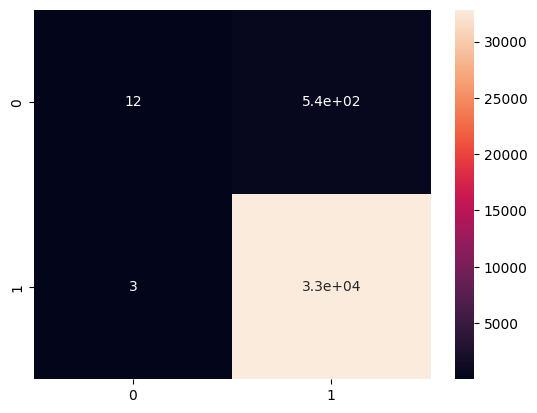

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train,y_train_xgb)
sns.heatmap(conf_mat,annot=True)
print(conf_mat)

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 8)                 56        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
Total params: 326
Trainable params: 326
Non-trainable params:

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
418/418 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.2917 - val_loss: -0.4968 - val_accuracy: 0.3426
Epoch 2/10
418/418 [==============================] - 1s 3ms/step - loss: -0.5849 - accuracy: 0.4569 - val_loss: -0.6338 - val_accuracy: 0.4822
Epoch 3/10
418/418 [==============================] - 1s 4ms/step - loss: -0.6457 - accuracy: 0.4864 - val_loss: -0.6566 - val_accuracy: 0.4822
Epoch 4/10
418/418 [==============================] - 1s 3ms/step - loss: -0.6651 - accuracy: 0.4872 - val_loss: -0.6784 - val_accuracy: 0.4814
Epoch 5/10
418/418 [==============================] - 2s 5ms/step - loss: -0.6882 - accuracy: 0.6606 - val_loss: -0.6988 - val_accuracy: 0.4828
Epoch 6/10
418/418 [==============================] - 2s 4ms/step - loss: -0.7105 - accuracy: 0.8050 - val_loss: -0.7204 - val_accuracy: 0.8534
Epoch 7/10
418/418 [==============================] - 1s 3ms/step - loss: -0.7382 - accuracy: 0.8342 - val_loss: -0.7444 - val_accuracy: 

In [ ]:
print(history)

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.7f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.7f}' .format(acc_test_auto))

261/261 [==============================] - 0s 2ms/step - loss: -0.7311 - accuracy: 0.9233

Autoencoder: Accuracy on training Data: 0.9264706
Autoencoder: Accuracy on test Data: 0.9233257


In [ ]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.7f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.7f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9834072
SVM : Accuracy on test Data: 0.9819097


In [ ]:
storeResults('SVM', acc_train_svm, acc_test_svm)

[[    0   554]
 [    0 32834]]


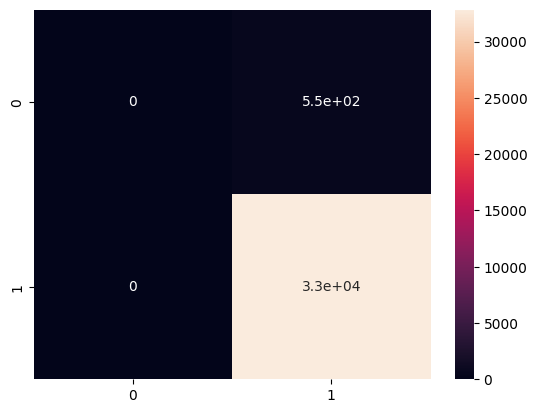

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train,y_train_svm)
sns.heatmap(conf_mat,annot=True)
print(conf_mat)

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)


In [ ]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.7f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.7f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.9834072
Multilayer Perceptrons: Accuracy on test Data: 0.9819097


In [ ]:
storeResults('Multilayer Perceptron', acc_train_mlp, acc_test_mlp)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train,y_train_mlp)
print(conf_mat)

[[    0   554]
 [    0 32834]]


In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.7f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.7f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9834671
Decision Tree: Accuracy on test Data: 0.9820295


In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
#checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), tree.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results
# results = pd.DataFrame({ 'ML Model': ML_Model,
#                          'Train Accuracy': acc_train,
#                          'Test Accuracy': acc_test.round(6)})
# results


,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.983,0.981
1,Random Forest,0.983,0.982
2,XGBoost,0.984,0.982
3,AutoEncoder,0.926,0.923
4,AutoEncoder,0.926,0.923
5,SVM,0.983,0.982
6,Multilayer Perceptron,0.983,0.982
7,Decision Tree,0.983,0.982


In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.984,0.982
1,Random Forest,0.983,0.982
5,SVM,0.983,0.982
6,Multilayer Perceptron,0.983,0.982
7,Decision Tree,0.983,0.982
0,Logistic Regression,0.983,0.981
3,AutoEncoder,0.926,0.923
4,AutoEncoder,0.926,0.923


In [ ]:
results.duplicated().sum()

In [ ]:
results.drop_duplicates(inplace=True)

In [ ]:
results

In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

In [ ]:
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

In [ ]:
loaded_model.predict(X)

In [ ]:
import pickle

In [ ]:
filename='phsishingDetection'
pickle.dump(xgb,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open(filename,'rb'))

In [ ]:
loaded_model.predict(X_test)


In [ ]:
import pickle
pickle_out = open("classifier1.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [ ]:
loaded_model1=pickle.load(open("classifier1.pkl",'rb'))

In [ ]:
# loaded_model1.predict(X_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
import pickle
pickle_out = open("classifier1.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [ ]:
loaded_model1=pickle.load(open("classifier1.pkl",'rb'))